<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho_final/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requisitos para o trabalho:
- Abrir o conjunto de dados em um DataFrame, 
- Visualizar os dados por meio de gráficos construídos com uma das bibliotecas gráficas vistas na disciplina,
- Utilizar aprendizado de máquina não supervisionado e/ou supervisionado para construir um modelo que seja capaz de prever uma propriedade de interesse.

# Obtenção dos dados

In [257]:
dataset = 'credit-g'
from sklearn.datasets import fetch_openml
risk_dataset = fetch_openml(name=dataset,version='1')
print(risk_dataset.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of the existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. P

In [258]:
print(risk_dataset.data.shape)

(1000, 20)


# Entendimento dos dados

In [259]:
import pandas as pd
df = pd.DataFrame(risk_dataset.data)
df.columns = risk_dataset.feature_names
df['risk'] = risk_dataset.target
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


## Missing values e data types

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [261]:
df.dtypes.value_counts()

float64     7
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64

In [220]:
import plotly.express as px

fig = px.histogram(df, x='risk')
fig.show()

In [221]:
for column in df.columns:
  fig = px.scatter(df, x=column, color='risk')
  fig.show()

# Preparação de dados

In [222]:
# Converter target para valores numéricos

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categories = risk_dataset.target.unique()
encoder.fit(categories)
target = encoder.transform(risk_dataset.target)
target

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [223]:
# Converter features qualitativas para valores numéricos

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
qualitative_features = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment',
                        'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans',
                        'housing', 'job', 'own_telephone', 'foreign_worker', 'risk']
risk_dataset.data[qualitative_features] = encoder.fit_transform(risk_dataset.data[qualitative_features])
risk_dataset.data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,1.0,6.0,1.0,6.0,1169.0,4.0,3.0,4.0,3.0,2.0,...,3.0,67.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,0.0,48.0,3.0,6.0,5951.0,2.0,0.0,2.0,0.0,2.0,...,3.0,22.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,3.0,12.0,1.0,2.0,2096.0,2.0,1.0,2.0,3.0,2.0,...,3.0,49.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0
3,1.0,42.0,3.0,3.0,7882.0,2.0,1.0,2.0,3.0,1.0,...,1.0,45.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0
4,1.0,24.0,2.0,4.0,4870.0,2.0,0.0,3.0,3.0,2.0,...,2.0,53.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,3.0,3.0,1736.0,2.0,1.0,3.0,0.0,2.0,...,3.0,31.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0
996,1.0,30.0,3.0,9.0,3857.0,2.0,0.0,4.0,1.0,2.0,...,1.0,40.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
997,3.0,12.0,3.0,6.0,804.0,2.0,3.0,4.0,3.0,2.0,...,0.0,38.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
998,1.0,45.0,3.0,6.0,1845.0,2.0,0.0,4.0,3.0,2.0,...,2.0,23.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [224]:
data = risk_dataset.data.to_numpy()
data

array([[ 1.,  6.,  1., ...,  1.,  1.,  1.],
       [ 0., 48.,  3., ...,  0.,  1.,  0.],
       [ 3., 12.,  1., ...,  0.,  1.,  1.],
       ...,
       [ 3., 12.,  3., ...,  0.,  1.,  1.],
       [ 1., 45.,  3., ...,  1.,  1.,  0.],
       [ 0., 45.,  1., ...,  0.,  1.,  1.]])

In [225]:
# Normalizar dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[0]

array([-0.46, -1.24, -1.15,  0.63, -0.75,  1.67,  1.1 ,  0.92,  0.83,
        0.3 ,  1.05,  1.33,  2.77,  0.22, -0.13,  1.03, -0.29, -0.43,
        1.21,  0.2 ,  0.65])

# Modelagem com KNN

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(1,9)}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=30)
clf.fit(data,target)
print(clf.score(data,target))
print(clf.best_params_)

0.982
{'n_neighbors': 8}


In [227]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(data,target)
print(knn.score(data,target))
print(knn.predict_proba(data))

0.982
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [228]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [229]:
# Separação dados de treinamento e testes

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 1.13,  0.26, -0.21, ..., -0.82,  0.2 ,  0.65],
        [ 1.13,  2.25, -2.09, ..., -0.82,  0.2 ,  0.65],
        [ 1.13, -0.74, -1.15, ...,  1.21,  0.2 ,  0.65],
        ...,
        [ 1.13, -0.99,  0.73, ..., -0.82,  0.2 ,  0.65],
        [-1.26, -0.24, -1.15, ..., -0.82,  0.2 , -1.53],
        [-1.26,  1.25, -0.21, ...,  1.21,  0.2 ,  0.65]]),
 array([[-0.46,  1.25,  0.73, ...,  1.21,  0.2 ,  0.65],
        [ 1.13, -0.99,  0.73, ..., -0.82, -5.1 ,  0.65],
        [ 1.13, -0.24,  0.73, ...,  1.21,  0.2 ,  0.65],
        ...,
        [ 1.13, -0.74, -1.15, ..., -0.82,  0.2 ,  0.65],
        [-1.26, -0.74,  0.73, ..., -0.82,  0.2 ,  0.65],
        [ 1.13, -1.24,  0.73, ..., -0.82,  0.2 ,  0.65]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [230]:
# Definição de função para exibição da ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

class_names = risk_dataset.target.unique()
color_map = plt.cm.Blues
options = [
    ("Confusion matrix, denormalized", None),
    ("Confusion matrix, normalized", "true"),
]

def confusion_matrix(y_test, y_pred, options, method, display_labels, color_map):
  column = 1
  for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
  plt.show()

In [231]:
y_pred = knn.fit(X_train, y_train).predict(X_test)

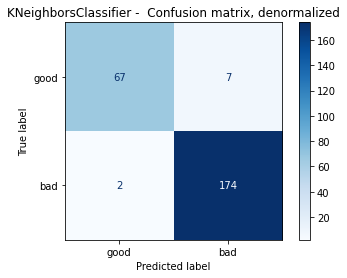

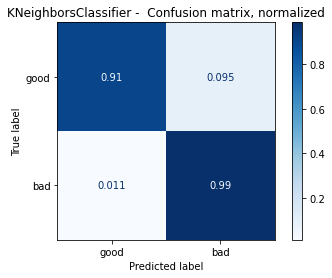

In [232]:
method= 'KNeighborsClassifier'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

# Modelagem com LDA

In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(data,target)
print(lda.score(data,target))
print(lda.predict_proba(data))
print(lda.explained_variance_ratio_)

1.0
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[1.]


In [234]:
lda.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [235]:
y_pred = lda.fit(X_train, y_train).predict(X_test)


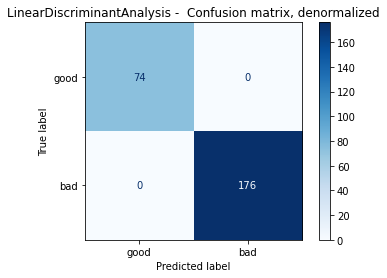

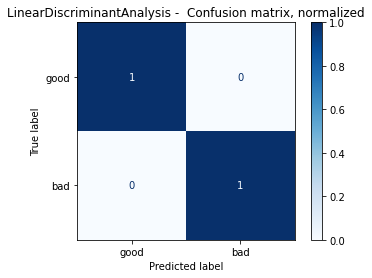

In [236]:
method = 'LinearDiscriminantAnalysis'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

# Modelagem com QDA

In [237]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(data,target)
print(qda.score(data,target))
print(qda.predict_proba(data))


1.0
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



In [238]:
qda.get_params(deep=True)

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [239]:
y_pred = qda.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



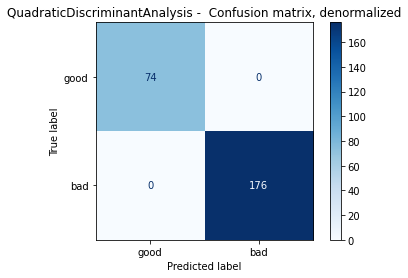

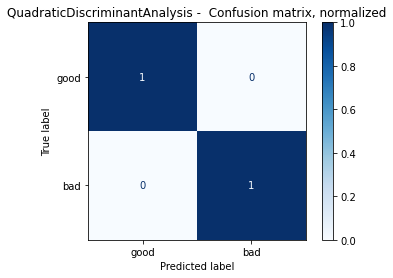

In [240]:
method = 'QuadraticDiscriminantAnalysis'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

# Modelagem com SVC

In [241]:
from sklearn.svm import SVC

parameters = { 'kernel': ('linear', 'rbf'), 'C': [1,10], 'gamma': ('scale', 'auto') }
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(data, target)
print(clf.score(data, target))
print(clf.best_params_)

1.0
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [242]:
svc = SVC(gamma='scale', kernel='linear', C=1)
svc.fit(data,target)
print(svc.score(data,target))
print(svc.predict(data))

1.0
[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 

In [243]:
svc.get_params(deep=True)

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [244]:
y_pred = svc.fit(X_train, y_train).predict(X_test)

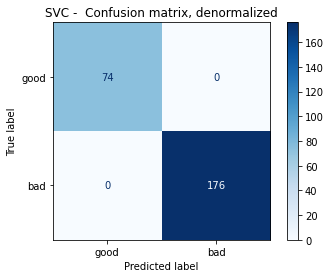

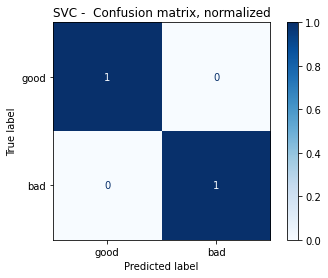

In [245]:
method = 'SVC'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

# Modelagem com MLP

In [246]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,15), random_state=1, max_iter=1000)
mlp.fit(data, target)    
mlp.predict(data)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [247]:
mlp.predict_proba(data)

array([[4.76e-11, 1.00e+00],
       [1.00e+00, 1.50e-11],
       [2.97e-11, 1.00e+00],
       ...,
       [6.21e-12, 1.00e+00],
       [1.00e+00, 1.02e-08],
       [6.39e-06, 1.00e+00]])

In [248]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15, 15),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

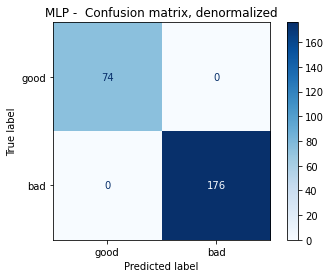

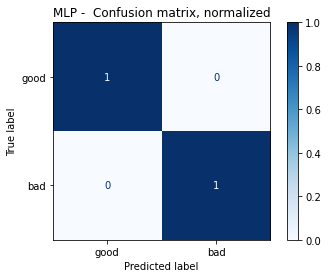

In [249]:
y_pred = mlp.fit(X_train, y_train).predict(X_test)
method = 'MLP'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)